<a href="https://colab.research.google.com/github/tanveerahmedss/Drugs-Side-Effects-and-Medical-Condition-Analysis/blob/main/Supermart_Grocery_Sales_Retail_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Load the Dataset

In this step, we will load the grocery sales dataset into a pandas DataFrame.

1. **Install Necessary Libraries**  
2. **Load the Dataset**  
   Load the dataset into a pandas DataFrame and check the first few rows to understand its structure.


In [ ]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
data = pd.read_csv(r"C:\Users\ta882\OneDrive\Documents\Desktop\supermart\Supermart Grocery Sales - Retail Analytics Dataset.csv", encoding='utf-8')

# Display the first 10 rows in a pretty table format
print(tabulate(data.head(10), headers='keys', tablefmt='pretty'))

+---+----------+---------------+------------------+------------------+----------------+------------+--------+-------+----------+--------+------------+
|   | Order ID | Customer Name |     Category     |   Sub Category   |      City      | Order Date | Region | Sales | Discount | Profit |   State    |
+---+----------+---------------+------------------+------------------+----------------+------------+--------+-------+----------+--------+------------+
| 0 |   OD1    |    Harish     |   Oil & Masala   |     Masalas      |    Vellore     | 11-08-2017 | North  | 1254  |   0.12   | 401.28 | Tamil Nadu |
| 1 |   OD2    |     Sudha     |    Beverages     |  Health Drinks   |  Krishnagiri   | 11-08-2017 | South  |  749  |   0.18   | 149.8  | Tamil Nadu |
| 2 |   OD3    |    Hussain    |   Food Grains    |   Atta & Flour   |   Perambalur   | 06-12-2017 |  West  | 2360  |   0.21   | 165.2  | Tamil Nadu |
| 3 |   OD4    |    Jackson    | Fruits & Veggies | Fresh Vegetables |   Dharmapuri   | 10-11-

# Step 2: Data Preprocessing

Data preprocessing is essential to clean and prepare the dataset for analysis. This step involves several actions:

### Check for Missing Data
Identify any missing values in the dataset to ensure data quality.

In [ ]:
# Check for missing values in each column
print(data.isnull().sum())


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


### Check for Duplicate Data
Check for and remove any duplicate records in the dataset to maintain uniqueness.

In [ ]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Remove duplicate rows if present
data.drop_duplicates(inplace=True)


Number of duplicate rows: 0


### Convert Data Types
Ensure that date columns are converted to the correct datetime format to facilitate time-based analysis.

In [ ]:
import pandas as pd

# Check for missing values and print them
missing_order_dates = data['Order Date'].isnull().sum()
print(f"Missing values in 'Order Date': {missing_order_dates}")

# Convert 'Order Date' to datetime format, coercing errors
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Check if any invalid dates were converted to NaT
invalid_dates = data['Order Date'].isnull().sum()
print(f"Invalid dates converted to NaT: {invalid_dates}")

# If necessary, you can drop rows with NaT in 'Order Date'
# data.dropna(subset=['Order Date'], inplace=True)



Missing values in 'Order Date': 0
Invalid dates converted to NaT: 5952


### Encode Categorical Variables
Convert categorical text data into numerical values using techniques like label encoding, making the data suitable for modeling.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['Category', 'Sub Category', 'City', 'Region', 'State']  # Adjust as necessary

# Initialize the Label Encoder
le = LabelEncoder()

# Encode categorical variables
for col in categorical_columns:
    # Check for missing values and fill them if necessary
    if data[col].isnull().any():
        data[col].fillna('Unknown', inplace=True)  # Fill missing values with 'Unknown' or any appropriate value
    # Ensure that the column is of type string
    data[col] = data[col].astype(str)
    # Fit and transform the data using LabelEncoder
    data[col] = le.fit_transform(data[col])

# Check the encoded values
print(data[categorical_columns].head())


   Category  Sub Category  City  Region  State
0         5            14    21       2      0
1         1            13     8       3      0
2         3             0    13       4      0
3         4            12     4       3      0
4         3            18    12       3      0


### Final Data Check
Review data types and confirm that the dataset is clean and ready for analysis by checking for any remaining missing values.

In [ ]:
# Check the data types of the features
print(data.dtypes)

# Check for missing values again
print(data.isnull().sum())


Order ID                 object
Customer Name            object
Category                  int32
Sub Category              int32
City                      int32
Order Date       datetime64[ns]
Region                    int32
Sales                     int64
Discount                float64
Profit                  float64
State                     int32
dtype: object
Order ID            0
Customer Name       0
Category            0
Sub Category        0
City                0
Order Date       5952
Region              0
Sales               0
Discount            0
Profit              0
State               0
dtype: int64


# Step 3: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) helps us understand the underlying patterns in the dataset. In this step, we will perform several analyses:

### Descriptive Statistics
Obtain summary statistics of the dataset to understand the distribution and central tendencies of the data.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\ta882\OneDrive\Documents\Desktop\supermart\Supermart Grocery Sales - Retail Analytics Dataset.csv", encoding='utf-8')

# Summary statistics
print(data.describe())


             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000


### Visualize Sales Distribution by Category
Create visualizations to understand how sales vary across different product categories.

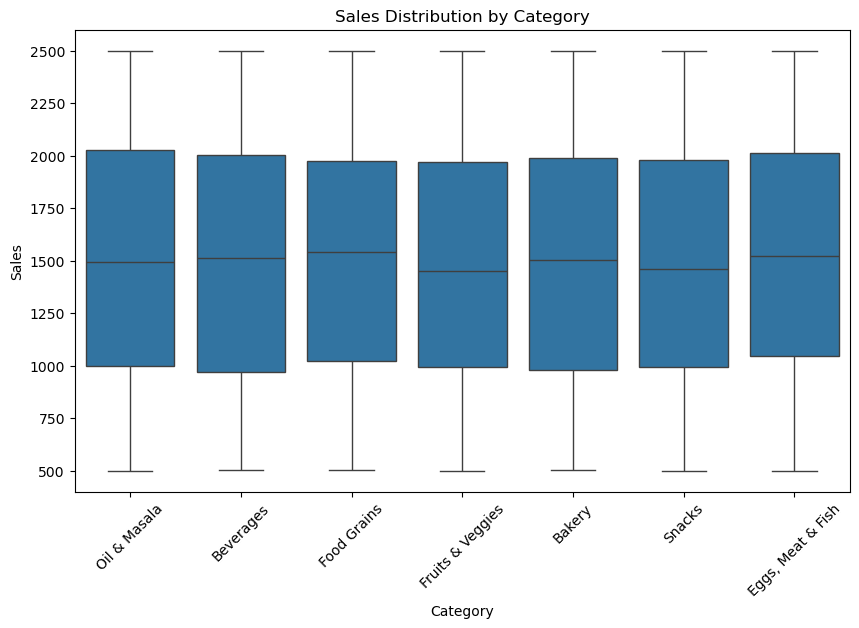

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\ta882\OneDrive\Documents\Desktop\supermart\Supermart Grocery Sales - Retail Analytics Dataset.csv", encoding='utf-8')

# Create a boxplot without specifying palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


### Create a Correlation Heatmap
Visualize relationships between different variables in the dataset to identify potential correlations.

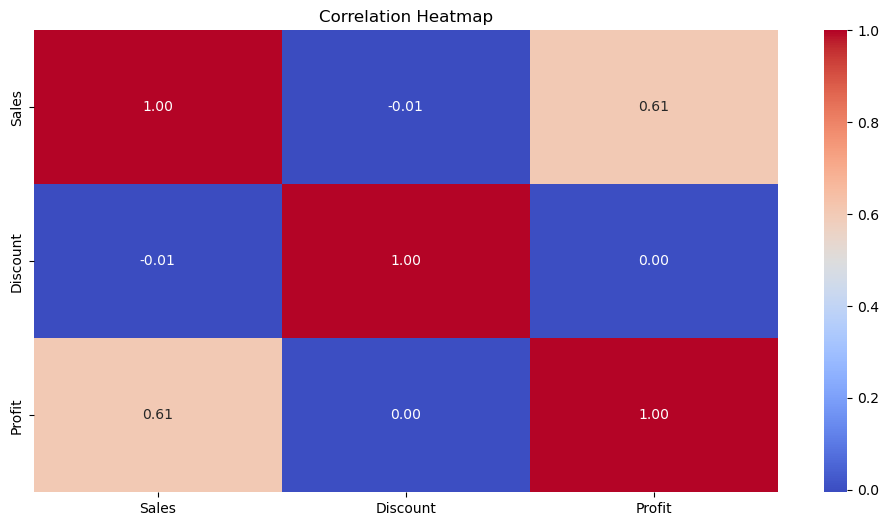

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\ta882\OneDrive\Documents\Desktop\supermart\Supermart Grocery Sales - Retail Analytics Dataset.csv", encoding='utf-8')


data.fillna(0, inplace=True)

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # fmt=".2f" for 2 decimal places
plt.title('Correlation Heatmap')
plt.show()


### Analyze Sales Trends Over Time
Generate a visualization that shows total sales over time, helping to identify patterns or trends.

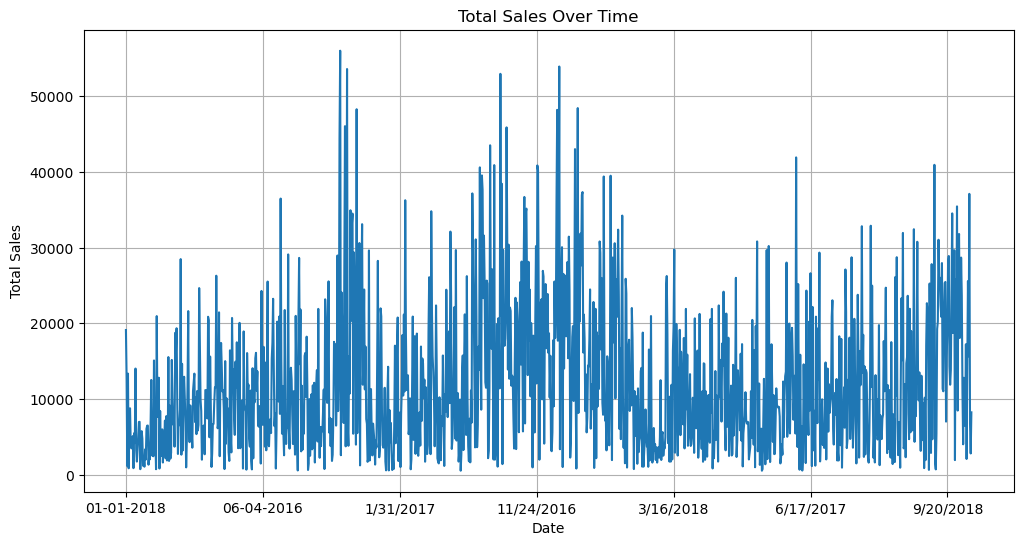

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


# Step 4: Data Visualization

In this step, we will create visualizations to further analyze the sales data:

### Visualize Total Sales by Month
Create a bar chart to analyze total sales by month, which can help in understanding seasonal trends.

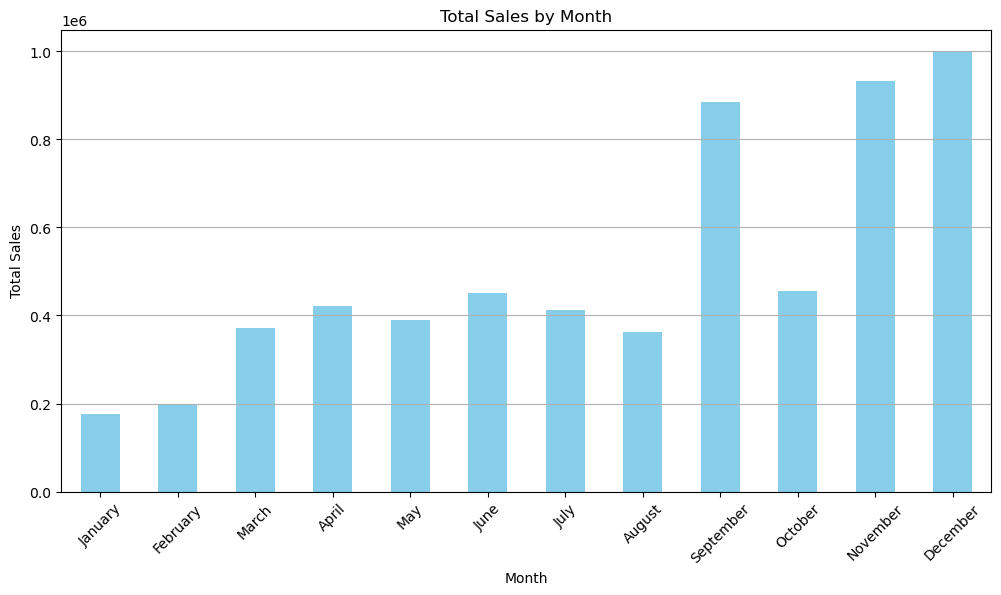

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\ta882\OneDrive\Documents\Desktop\supermart\Supermart Grocery Sales - Retail Analytics Dataset.csv", encoding='utf-8')

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Extract month from the 'Order Date' for monthly sales analysis
data['Month'] = data['Order Date'].dt.month_name()

# Group data by month and sum sales
monthly_sales = data.groupby('Month')['Sales'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May',
     'June', 'July', 'August', 'September', 'October',
     'November', 'December']
)

# Plot monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



### Visualize Top 5 Cities by Sales
Identify which cities contribute the most to sales through a bar chart visualization.

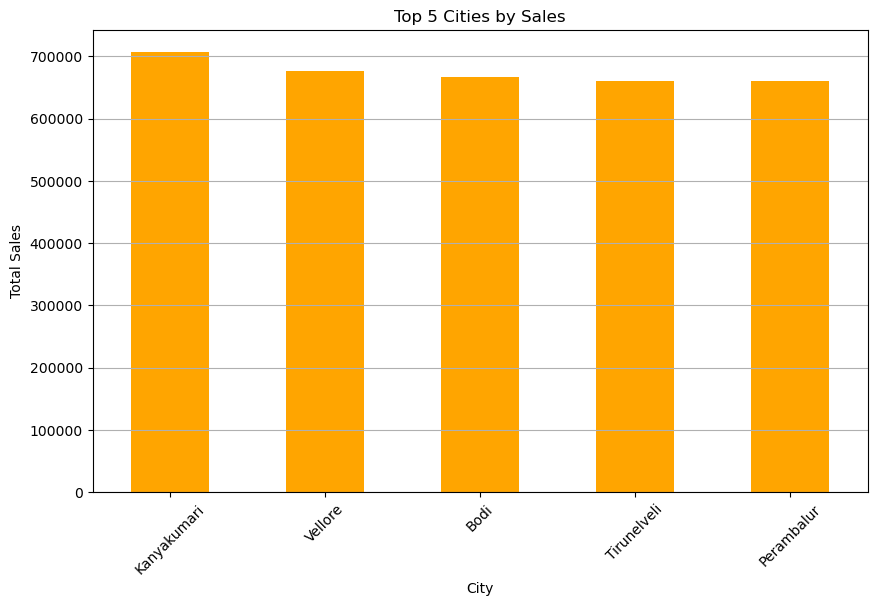

In [ ]:
# Calculate total sales per city
city_sales = data.groupby('City')['Sales'].sum()

# Select the top 5 cities by sales
top_cities = city_sales.nlargest(5)

# Plot the top 5 cities by sales
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='orange')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Step 5: Feature Selection and Model Building

In this step, we select the relevant features and the target variable (Sales) from the dataset. We then split the data into training and testing sets, using 80% of the data for training the model and 20% for testing. A Linear Regression model is trained on the training data, and predictions are made on the test set. The model's performance is evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R²). Finally, we visualize the results by creating a scatter plot to compare actual sales against predicted sales.


Mean Squared Error: 215237.43
R-squared: 0.35


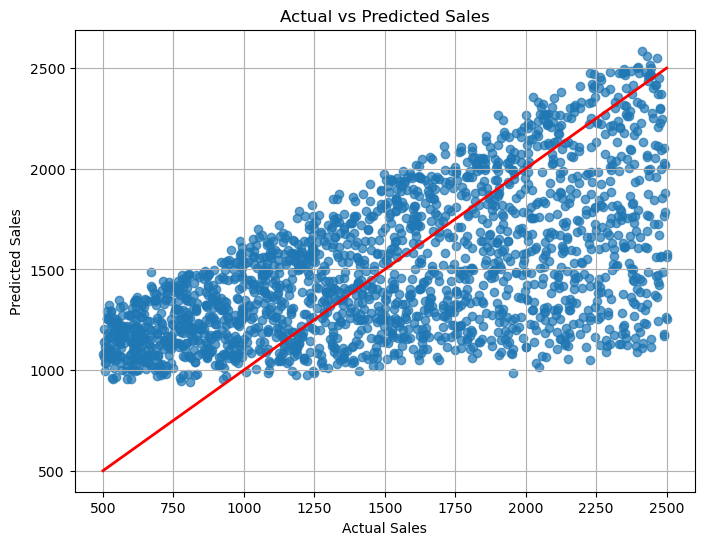

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv(r"C:\Users\ta882\OneDrive\Documents\Desktop\supermart\Supermart Grocery Sales - Retail Analytics Dataset.csv", encoding='utf-8')

# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Extract month from the 'Order Date'
data['Month'] = data['Order Date'].dt.month_name()

# Feature Selection
features = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
target = data['Sales']  # Target variable is 'Sales'

# One-hot encode categorical variables
features = pd.get_dummies(features, drop_first=True)

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid()
plt.show()


# Conclusion

In this project, we successfully analyzed grocery sales data, performed data preprocessing, conducted exploratory data analysis, visualized key trends, and built a predictive model using linear regression. The evaluation metrics provided insight into the model's performance, indicating its ability to predict sales based on the features provided.
